# Duffing Oscillator - IVP

$\LARGE{\kappa \ddot{x} +\delta {\dot{x}} +\alpha x+\beta x^{3}=\gamma \cos(\omega t)}$

$\large{V(x)=\frac{1}{4}x^4−\frac{1}{2}x^2}$

Text(0, 0.5, '$V(x)$')

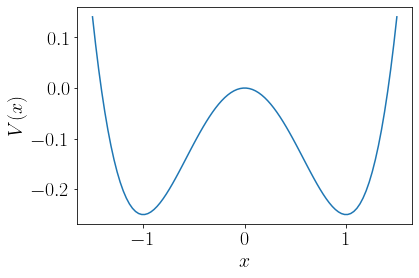

In [6]:
import numpy as np
from scipy.integrate import odeint, quad
from scipy.optimize import brentq
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import seaborn as sbs
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 20})
rc('text', usetex=True)
rc('animation', html='html5')

# The potential and its first derivative, as callables.
V = lambda x: 0.5 * x**2 * (0.5 * x**2 - 1)
dVdx = lambda x: x**3 - x

# The potential energy function on a grid of x-points.
xgrid = np.linspace(-1.5, 1.5, 100)
Vgrid = V(xgrid)

plt.plot(xgrid, Vgrid)
plt.xlabel('$x$')
plt.ylabel('$V(x)$')

In [7]:
def deriv(X, t, gamma, delta, omega):
    """Return the derivatives dx/dt and d2x/dt2."""

    x, xdot = X
    xdotdot = -dVdx(x) -delta * xdot + gamma * np.cos(omega*t)
    return xdot, xdotdot

def solve_duffing(tmax, dt_per_period, t_trans, x0, v0, gamma, delta, omega):
    # Time point spacings and the time grid

    period = 2*np.pi/omega
    dt = 2*np.pi/omega / dt_per_period
    step = int(period / dt)
    t = np.arange(0, tmax, dt)
    # Initial conditions: x, xdot
    X0 = [x0, v0]
    X = odeint(deriv, X0, t, args=(gamma, delta, omega))
    idx = int(t_trans / dt)
    return t[idx:], X[idx:], dt, step

In [8]:
# Set up the motion for a oscillator with initial position
# x0 and initially at rest.
x0, v0 = 0, 0
tmax, t_trans = 18000, 300
omega = 1.4
gamma, delta = 0.39, 0.1
dt_per_period = 100

# Solve the equation of motion.
t, X, dt, pstep = solve_duffing(tmax, dt_per_period, t_trans, x0, v0, gamma, delta, omega)
x, xdot = X.T